In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !pip install -U ipython
else:
    print('Not running on CoLab')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

# ------ standard imports ------ #
!pip install roboticstoolbox-python
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
# -------------------------------

Not running on CoLab


# 2.2 Working in Two Dimensions (2D)

## 2.2.1 Orientation in Two Dimensions

### 2.2.1.1 2D Rotation Matrix

In [2]:
R = rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

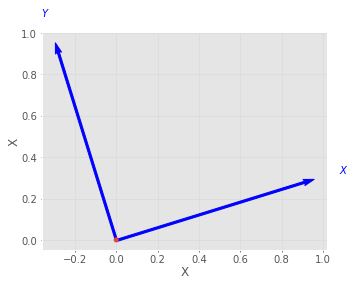

In [3]:
trplot2(R);

In [4]:
np.linalg.det(R)

0.9999999999999999

In [5]:
np.linalg.det(R @ R)

0.9999999999999998

In [6]:
from sympy import Symbol, Matrix, simplify
theta = Symbol('theta')
R = Matrix(rot2(theta))  # convert to SymPy matrix

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [7]:
simplify(R * R)
R.det()
R.det().simplify()

1

### 2.2.1.2 Matrix Exponential for Rotation

In [8]:
R = rot2(0.3);
L = sp.linalg.logm(R)

array([[       0,     -0.3],
       [     0.3,        0]])

In [9]:
S = vex(L)

array([     0.3])

In [ ]:
sp.linalg.expm(L)

In [ ]:
sp.linalg.expm(skew(S))

In [ ]:
X = skew(2)
vex(X)

## 2.2.2 Pose in Two Dimensions

### 2.2.2.1 2D Homogeneous Transformation Matrix

In [10]:
rot2(0.3)
trot2(0.3)

array([[ 0.95533649, -0.29552021],
       [ 0.29552021,  0.95533649]])

array([[ 0.95533649, -0.29552021,  0.        ],
       [ 0.29552021,  0.95533649,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

<AxesSubplot:xlabel='X', ylabel='Y'>

<AxesSubplot:xlabel='X', ylabel='Y'>

<AxesSubplot:xlabel='X', ylabel='Y'>

<AxesSubplot:xlabel='X', ylabel='Y'>

<AxesSubplot:xlabel='X', ylabel='Y'>

<AxesSubplot:xlabel='X', ylabel='Y'>

[[<matplotlib.lines.Line2D at 0x7fcef2547640>]]

[[ 0.8660254 -0.5        1.       ]
 [ 0.5        0.8660254  2.       ]
 [ 0.         0.         1.       ]]
[3 2]


array([ 1.73205081, -1.        ,  1.        ])

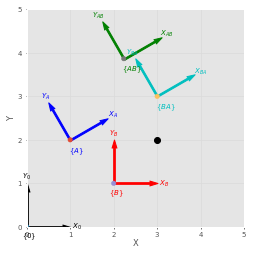

In [19]:
TA = transl2(1, 2) @ trot2(30, "deg")
plotvol2([0, 5]); # new plot with both axes from 0 to 5
trplot2(TA, frame="A", color="b");
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");  # reference frame
TB = transl2(2, 1)
trplot2(TB, frame="B", color="r");
TAB = TA @ TB
trplot2(TAB, frame="AB", color="g");
TBA = TB @ TA;
trplot2(TBA, frame="BA", color="c");
P = np.array([3, 2]);
plot_point(P, "ko", label="P");
print(TA)
print(P)
np.linalg.inv(TA) @ np.hstack([P, 1])

In [17]:
h2e(np.linalg.inv(TA) @ e2h(P))

array([[ 1.73205081],
       [-1.        ]])

In [18]:
homtrans(np.linalg.inv(TA), P)

array([[ 1.73205081],
       [-1.        ]])

### 2.2.2.2 Rotating a Coordinate Frame

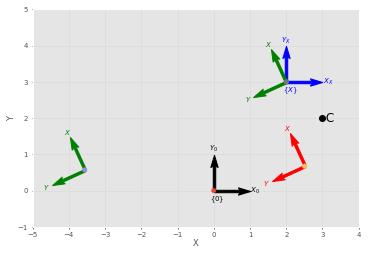

In [2]:
plotvol2([-5, 4, -1, 5]);
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");
TX = transl2(2, 3);
trplot2(TX, frame="X", color="b");
TR = trot2(2);
trplot2(TR @ TX, framelabel="RX", color="g");
trplot2(TX @ TR, framelabel="XR", color="g");
C = np.array([3, 2]);
plot_point(C, "ko", text="C");
TC = transl2(C) @ TR @ transl2(-C)
trplot2(TC @ TX, framelabel="XC", color="r");

### 2.2.2.3 Matrix exponential for Pose

In [3]:
L = sp.linalg.logm(TC)

array([[ 2.10900770e-16, -2.00000000e+00,  4.00000000e+00],
       [ 2.00000000e+00, -1.55389618e-16, -6.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [4]:
S = vexa(L)

array([ 4., -6.,  2.])

In [5]:
sp.linalg.expm(skewa(S))

array([[-0.41614684, -0.90929743,  6.06703536],
       [ 0.90929743, -0.41614684,  0.10440139],
       [ 0.        ,  0.        ,  1.        ]])

In [6]:
X = skewa([1, 2, 3])

array([[ 0., -3.,  1.],
       [ 3.,  0.,  2.],
       [ 0.,  0.,  0.]])

In [7]:
vexa(X)

array([1., 2., 3.])

### 2.2.2.4 2D Twists

In [ ]:
S = Twist2.UnitRevolute(C)
sp.linalg.expm(skewa(2 * S.S))
S.exp(2)
S.pole
S = Twist2.UnitPrismatic([0, 1])
S.exp(2)
T = transl2(3, 4) @ trot2(0.5)
S = Twist2(T)
S.w
S.pole
S.exp(1)

# 2.3 Working in Three Dimensions (3D)

## 2.3.1 Orientation in Three Dimensions

### 2.3.1.1 3D Rotation Matrix

In [ ]:
R = rotx(pi / 2)
trplot(R);
#tranimate(R)
trplot(R, anaglyph=True)
tranimate(R, anaglyph=True);
R = rotx(pi / 2) @ roty(pi / 2)
trplot(R);
roty(pi / 2) @ rotx(pi / 2)

### 2.3.1.2 Three-Angle Representations

In [ ]:
R = rotz(0.1) @ roty(0.2) @ rotz(0.3);
R = eul2r(0.1, 0.2, 0.3)
gamma = tr2eul(R)
R = eul2r(0.1, -0.2, 0.3)
gamma = tr2eul(R)
eul2r(gamma)
R = eul2r(0.1, 0, 0.3)
tr2eul(R)
R = rpy2r(0.1, 0.2, 0.3, order="zyx")
gamma = tr2rpy(R, order="zyx")
R = rpy2r(0.1, 0.2, 0.3, order="xyz")
gamma = tr2rpy(R, order="xyz")

### 2.3.1.4 Two-Vector Representation

In [ ]:
a = [-1, 0, 0]
o = [1, 1, 0]
R = oa2r(o, a)

### 2.3.1.5 Rotation about an Arbitrary Vector

In [ ]:
R = rpy2r(0.1, 0.2, 0.3);
theta, v = tr2angvec(R)
theta
v
e, x = np.linalg.eig(R)
e
x
theta = np.angle(e[0])
R = angvec2r(0.3, [1, 0, 0])

### 2.3.1.6 Matrix Exponential for Rotation

In [ ]:
R = rotx(0.3)
L = sp.linalg.logm(R)
S = vex(L)
L = trlog(R);
sp.linalg.expm(L)
trexp(L);
sp.linalg.expm(skew(S))
R = rotx(0.3);
R = sp.linalg.expm(0.3 * skew([1, 0, 0]));
X = skew([1, 2, 3])
vex(X)

### 2.3.1.7 Unit Quaternions

In [ ]:
q = UnitQuaternion(rpy2r(0.1, 0.2, 0.3))
q = q * q;
q.inv()
q * q.inv()
q / q
q.R
q * [1, 0, 0]
q.plot();

## 2.3.2 Pose in Three Dimensions

### 2.3.2.1 Homogeneous Transformation Matrix

In [ ]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0)
trplot(T);
t2r(T)
transl(T)

### 2.3.2.2 Matrix exponential for Pose

In [ ]:
T = transl(2, 3, 4) @ trotx(0.3)
L = sp.linalg.logm(T)
S = vexa(L)
sp.linalg.expm(skewa(S))
X = skewa([1, 2, 3, 4, 5, 6])
vexa(X)

### 2.3.2.3 3D Twists

In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])
sp.linalg.expm(0.3 * skewa(S.S));
S.exp(0.3)
S = Twist3.UnitRevolute([0, 0, 1], [2, 3, 2], 0.5)
X = transl(3, 4, -4);
for theta in np.arange(0, 15, 0.3):
  trplot(S.exp(theta).A @ X, style="rgb", width=2)
L = S.line()
L.plot('k:', linewidth=2);
S = Twist3.UnitPrismatic([0, 1, 0])
S.exp(2)
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)
S.w
S.pole
S.pitch
S.theta

# 2.4 Advanced Topics

## 2.4.5 Distance Between Orientations

In [ ]:
UnitQuaternion.Rx(pi / 2).angdist(UnitQuaternion.Rz(-pi / 2))

### 2.4.6 Normalization

In [ ]:
R = np.eye(3,3);
np.linalg.det(R) - 1
for i in range(100):
  R = R @ rpy2r(0.2, 0.3, 0.4);
np.linalg.det(R) - 1
R = trnorm(R);
np.linalg.det(R) - 1

### 2.4.8 More About Twists

In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])
S.S
S.v
S.w
S.se3()
trexp(0.3 * S.se3())
S.exp(0.3)
S2 = S * S
S2.printline(orient="angvec", unit="rad")
line = S.line()
line.plot("k:", linewidth=2);
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)
S / S.theta
S.unit();
S.exp(0)
S.exp(1)
S.exp(0.5)

# 2.5 Using the Toolbox

In [ ]:
from spatialmath.base import *
from spatialmath import *
R = rotx(0.3)  # create SO(3) matrix as NumPy array
print(R)

In [ ]:
type(R)

In [ ]:
R = SO3.Rx(0.3)  # create SO3 object
print(R)

In [ ]:
type(R)

In [ ]:
R.A

In [ ]:
R = SO3(rotx(0.3));                   # convert an SO(3) matrix
R = SO3.Rz(0.3);                      # rotation about z-axis
R = SO3.RPY(10, 20, 30, unit="deg");  # from roll-pitch-yaw angles
R = SO3.AngleAxis(0.3, (1, 0, 0));    # from angle and rotation axis
R = SO3.EulerVec((0.3, 0, 0));        # from an Euler vector

In [ ]:
R.rpy();        # convert to roll-pitch-yaw angles
R.eul();        # convert to Euler angles
R.printline();  # compact single-line print

In [ ]:
R = SO3.RPY(10, 20, 30, unit="deg");             # create an SO(3) rotation
T = SE3.RPY(10, 20, 30, unit="deg");             # create a purely rotational SE(3)
S = Twist3.RPY(10, 20, 30, unit="deg");          # create a purely rotational twist
q = UnitQuaternion.RPY(10, 20, 30, unit="deg");  # create a unit quaternion

In [ ]:
TA = SE2(1, 2) * SE2(30, unit="deg");
type(TA)
TA
TA = SE2(1, 2, 30, unit="deg");
TA.R
TA.t
TA.plot(frame="A", color="b");
TA.printline()

In [ ]:
P = [3, 2];
TA.inv() * P
R = SO3.Rx(np.linspace(0, 1, 5));
len(R)
R[3]
R * [1, 2, 3]